# Laptop Price Prediction App

## Importing Libraries and loading the dataset



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Data Cleaning



### Checking Duplicates and Null Values



In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Dropping unnecessary columns and formatting other columns



In [7]:
# Dropping unnamed column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [54]:
## Removing gb from RAM and converting to int 32
df['RAM'] = df['Ram'].str.replace('GB', '').astype(np.int32)

In [10]:
## Removing kgs from Weight and converting to float 32
df['Weight'] = df['Weight'].str.replace('kg', '').astype(np.float32)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  RAM               1303 non-null   int32  
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


## Exploratory Data Analysis (EDA)

In [12]:
import seaborn as sns


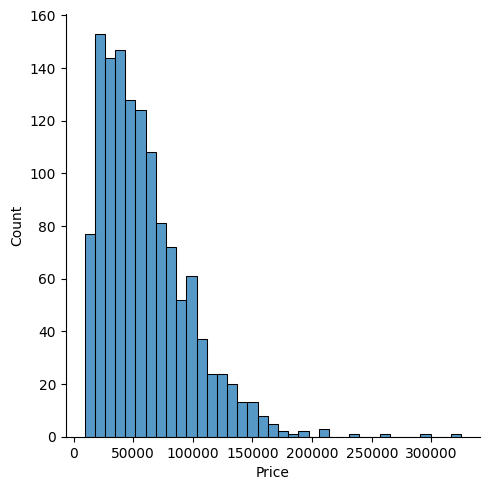

In [13]:
sns.displot(df['Price'])

- The plot is skewed to the right, indicating that most laptops are priced lower, with a few high-end models skewing the average price higher.

<Axes: xlabel='Company'>

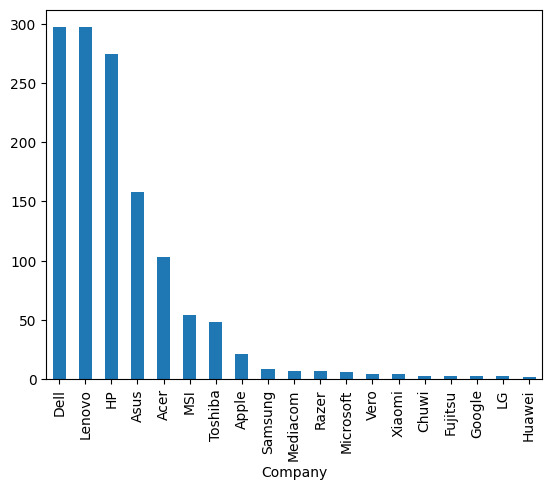

In [14]:
df['Company'].value_counts().plot(kind='bar')

- Top 3 brands with the highest average price are Dell, Lenovo and HP.
- Last brands are Vero, Chuwi, Google, Fujitsu, LG and Huawei

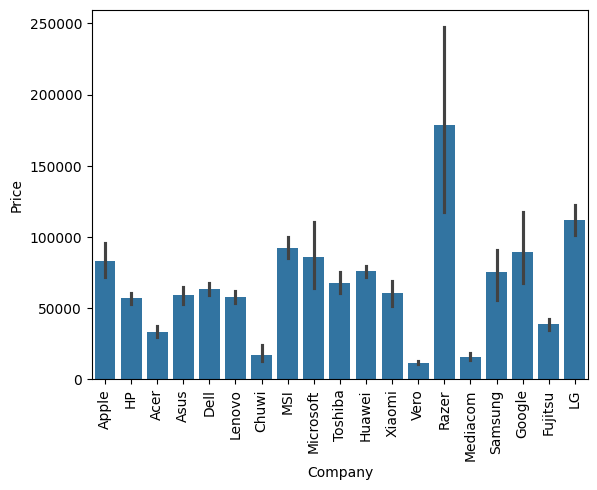

In [15]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

- Most costly laptops are from Razer, LG, MSI, Apple and Microsoft.

<Axes: xlabel='TypeName'>

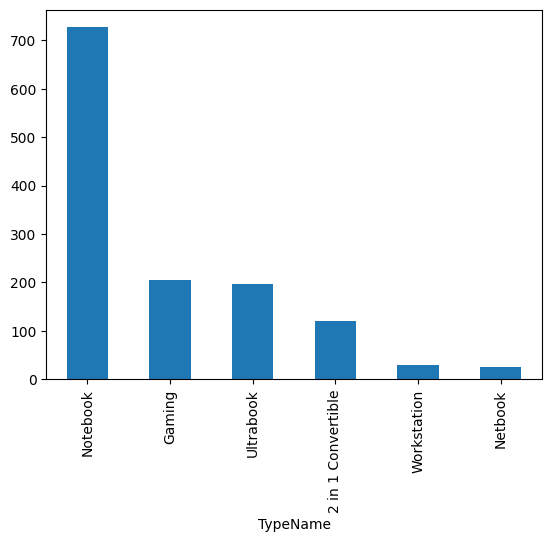

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

- Notebooks are the most common type of laptop, followed by Gaming and Ultrabooks with Netbooks being the least common.

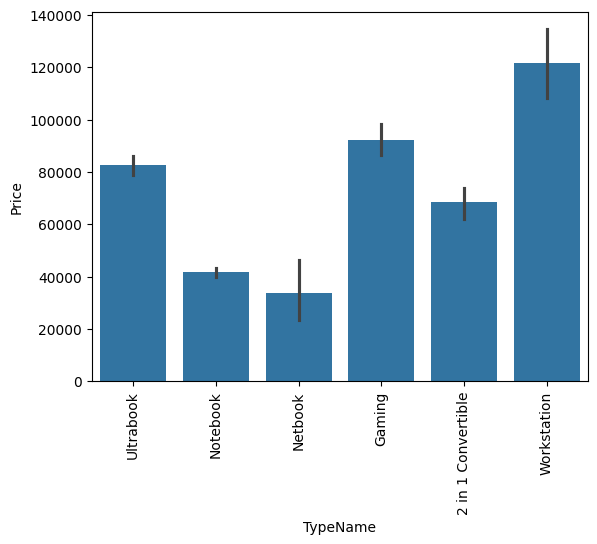

In [17]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

- Workstations are the most expensive type of laptop, followed by Gaming and Ultrabooks, with Netbooks being the least expensive.

C:\Users\BHAVYASHA\AppData\Local\Temp\ipykernel_948\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

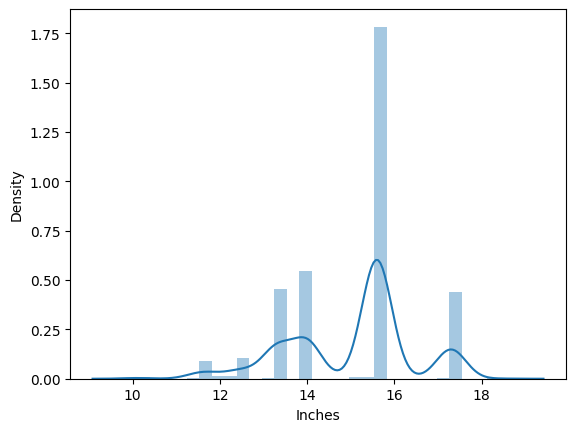

In [18]:
sns.distplot(df['Inches'])

- Most Laptops lie between in 15.6 and 17.3 inches, with 15.6 being the most common size.

### Feature Engineering from Screen Resolution column

In [19]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0


<Axes: xlabel='Touchscreen'>

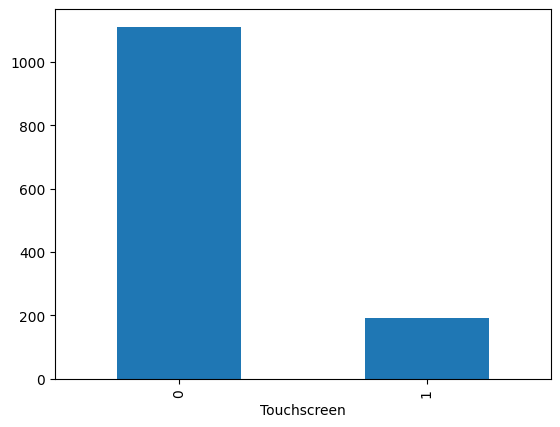

In [22]:
df['Touchscreen'].value_counts().plot(kind='bar')

- Most laptops are not touchscreen, with only a small percentage having touchscreen capabilities.

<Axes: xlabel='Touchscreen', ylabel='Price'>

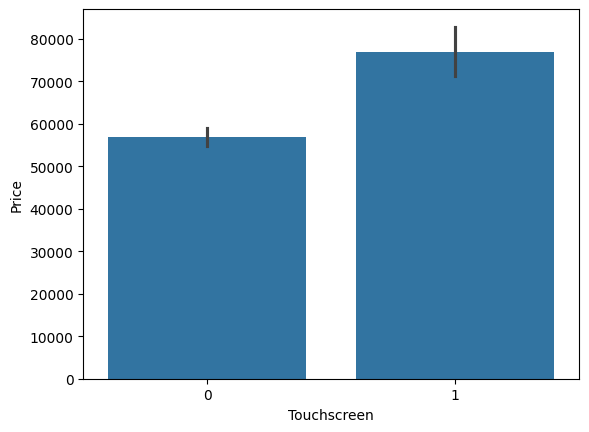

In [23]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

- Touchscreen laptops are more expensive on average compared to non-touchscreen laptops, indicating that touchscreen functionality adds value to the laptop.
- Touchscreen lie between 70000 and 80000, while non-touchscreen lie between 50000 and 60000.

In [24]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1


<Axes: xlabel='Ips'>

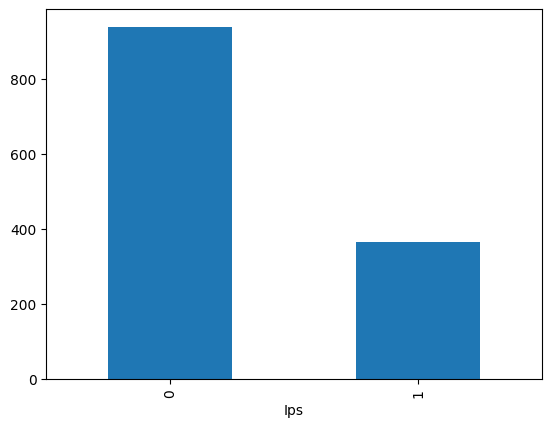

In [26]:
df['Ips'].value_counts().plot(kind='bar')

- Most laptops don't have IPS display, with only a small percentage having IPS display capabilities.

<Axes: xlabel='Ips', ylabel='Price'>

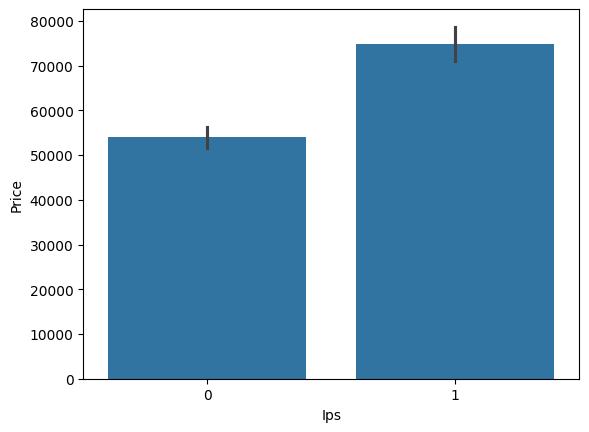

In [27]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [28]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True) # Splitting the ScreenResolution column into two new columns stored in new variable

In [29]:
df['X_res'] = new[0] # Assigning the first part of the split to X_res column
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]) 
# As X_res might have extra words as it is first part so we are replacing ',' with '' and then extracting the first number using regex
# r'(\d+\.?\d+)' is a regex pattern that matches one or more digits, optionally followed by a decimal point and more digits in the string
# .apply(lambda x:x[0]) is used to extract the number from the list returned by str.findall, that number is at index 0
df['Y_res'] = new[1]

In [32]:
df['X_res'] = df['X_res'].astype('int') # Converting X_res to int32
df['Y_res'] = df['Y_res'].astype('int') # Converting X_res to int32


In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,2560,1600


In [33]:
## Making New column ppi measuring pixels per inch
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [34]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [35]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,2560,1600,226.983005


In [36]:
## Dropping X_res and Y_res and Inches as we have ppi now
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [37]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,226.983005


In [38]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

### Feature Engineering from CPU column

As cpu column has many different types of values, we will make 2 new columns for cpu 

In [39]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) # first three words of cpu name are like intel core i5

In [40]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,226.983005,Intel Core i5


In [41]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [42]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor) # Fetching CPU brand

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

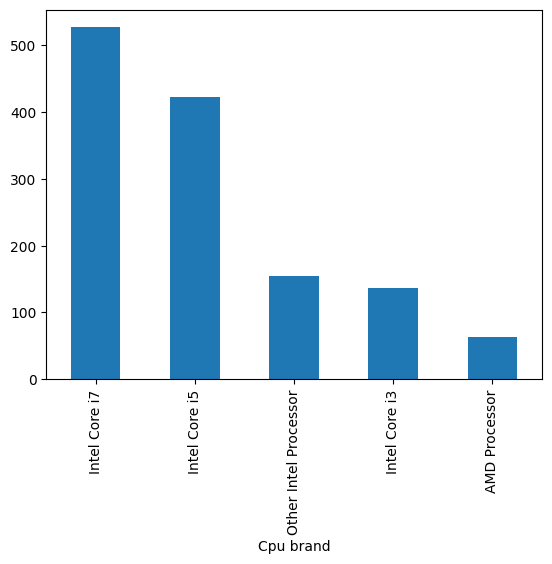

In [44]:
df['Cpu brand'].value_counts().plot(kind='bar')

Most Laptops have intel Core i7

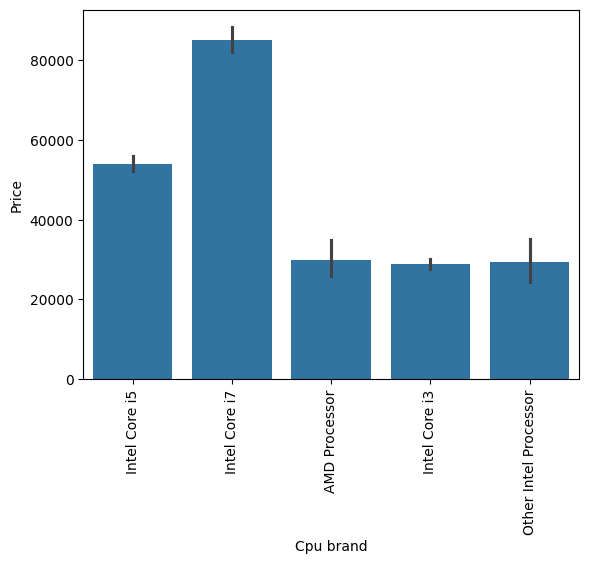

In [45]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Also the most expensive is intel i7

In [46]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,226.983005,Intel Core i5


### Looking at RAM column

<Axes: xlabel='Ram'>

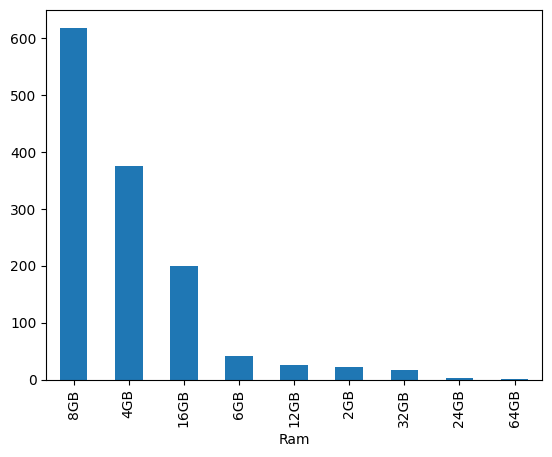

In [48]:
df['Ram'].value_counts().plot(kind='bar')

8GB Ram is highest nearly 600 laptops

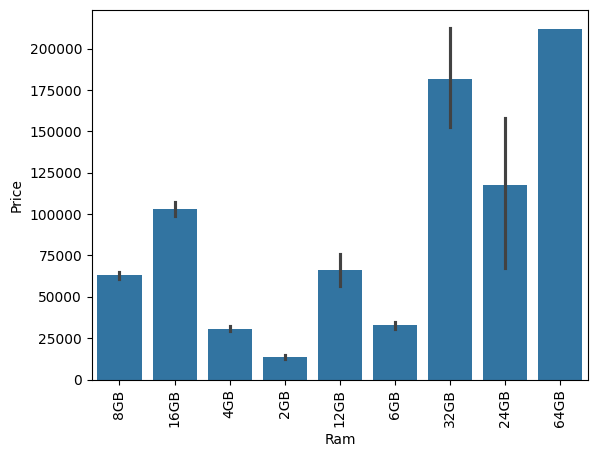

In [49]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Feature Engineering from Memory Column

In [50]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [53]:
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"] = df["second"].fillna("0")

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Handle empty strings after regex replacement
df["first"] = df["first"].replace('', '0')
df["second"] = df["second"].replace('', '0')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,226.983005,Intel Core i5,0,256,0,0


In [56]:
df.drop(columns=['Memory'],inplace=True)

In [57]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,RAM,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8GB,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,226.983005,Intel Core i5,0,256,0,0


In [59]:
df.select_dtypes(include=[np.number]).corr()['Price']


Weight           0.210370
Price            1.000000
RAM              0.743007
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [60]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)